<a href="https://colab.research.google.com/github/Philliec459/Science-and-Technology-Society-Use-of-NASA-Landsat-Data-to-Calculate-NDVI-and-PNDVI/blob/main/CoLab_VegIndex4_training_RobinsonPreserve_simple_Level2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**If using CoLab download your data and any necessarey python libraries:**

In [1]:
using_colab = False

In [2]:
if using_colab:

    !wget 'https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-Landsat-Data-to-Calculate-NDVI-and-PNDVI/blob/main/Robinson_Preserve_landsat_Band_4.TIF'
    !wget 'https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-Landsat-Data-to-Calculate-NDVI-and-PNDVI/blob/main/Robinson_Preserve_landsat_Band_5.TIF'
    !wget 'https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-Landsat-Data-to-Calculate-NDVI-and-PNDVI/blob/main/Clipped_Mangroves_Robinson_Preserve.geojson'
   
    
    #https://colab.research.google.com/github/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/blob/main/STELLA_brief_ver2_backyard_grass_shoreline.ipynb
    
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/STELLA_brief_ver2_backyard_grass_shoreline.ipynb    
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_grass_shade_whiteshade.xlsx
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_FullSun.xlsx


    !pip install rasterio
    #!pip install --upgrade scikit-learn
    !pip install gdal
    !pip install geopandas
    #!pip install osgeo
    #!pip install osgeo


![image.png](https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-Landsat-Data-to-Calculate-NDVI-and-PNDVI/blob/main/sts_nasa.png?raw=1)

# **[STS](https://scienceandtechnologysociety.org/) Approach to Map Vegetative Habitats for a Proposed Study Areas in Robinson Preserve, Manatee County, Florida.**


## Introduction:

In a report supplied by Sherri Swanson of Manatee County called the Mangrove Heart Attack, the authors employ some interesting methods to identify Mangrove Forests from Landsat Spectral data. They calculated the Normalized Difference Vegetative Index (NDVI) from their Landsat-type data and then used simple NDVI cutoffs to differentiate and map their Mangrove Habitats and assess the health of these Mangroves too.

We were inspired by this report, so we tried some of the techniques mentioned in this report using python to process the data. We first went to [Earth Explorer](https://earthexplorer.usgs.gov/) to download our Level 1 and Level 2 Landsat data with all the spectral channels.  

![image.png](https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-Landsat-Data-to-Calculate-NDVI-and-PNDVI/blob/main/EarthExplorer.png?raw=1)

You will need to setup an account in order to download any data. There is no charge for the account or for the downloading of the data.

We applied a Reflectance Correction per the advice from Mike Taylor of NASA, and this made a huge difference with all the Landsat Band data corrected to Reflectance, epsecially from the Level 2 processed Landsat data used in Calculating NDVI. The following  equation was use to correct the raw Landsat Band data to Reflectance Band data:

    corrected_array = image_array * 0.0000275 - 0.2

Landsat data is stored as integers probably due to minimize the size and transfer time of these data from the satellite back to earth.  Mike's recommended correction then converts this integer data into [Reflectance](https://www.usgs.gov/faqs/how-do-i-use-a-scale-factor-landsat-level-2-science-products).

![image.png](https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-Landsat-Data-to-Calculate-NDVI-and-PNDVI/blob/main/USGS_Reflectance_Corrections.png?raw=1)
https://www.usgs.gov/faqs/how-do-i-use-a-scale-factor-landsat-level-2-science-products

Per the USGS Landsat data is stored as integer values ranging from 7,273 to 43,636 per USGS document above. This is a difference of 36,363 integer values within this range, or a value of 0.0000275 for each integer value.

    1/36,363 =  0.0000275
    
Since  0.0000275 is the *Reflectance per Integer*, then

    Apparent Reflectance of Integer of 7,237 *  0.0000275 = 0.2
    
and

    Apparent Reflectance of Integer of 43,626  *  0.0000275 = 1.2
    
To convert our *Apparent Reflectance* to *Reflectance* as an index, we subtract 0.2 from the *Apparent Reflectance* and now *Reflectance* is scaled between 0 and 1.

From the Reflectance corrected Band data we can then calculate NDVI using the following equation:

    NDVI = (near IR - Red)/(near IR + Red) = (Band 5 - Band 4)/(Band 5 + Band 4)

NDVI appears to be a great indicator that provides useful information in making vegetative identifications as suggested by the name. We were able calculated NDVI for the Robinson Preserve area including West Bradenton.  In some of the plots below, most of the warmer colors are actual mangrove habitat estimates.

![image.png](https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-Landsat-Data-to-Calculate-NDVI-and-PNDVI/blob/main/NDVI.png?raw=1)

In the Mangrove Heart Attack report, they applied simple cutoffs to the NDVI index data to identify their Mangrove habitats, and in this report they went as far as to identify species of Mangroves too. For now, we are satisfied with being able to identify Mangroves in general.  

NDVI calculates an index ranging from our Landsat spectral data from -3 to 3. For our estimate we initially colored our NDVI image from 0. to 1, where these cutoff values create the surface areas that correlates fairly well to the mapped mangrove locations as reported by [GeoData](https://geodata.myfwc.com/datasets/a78a27e02f9d4a71a3c3357aefc35baf/about). We probably have an 80% solution using this simple technique; and other than some lawns in Bradenton, we are doing pretty well.

This is a start, but with a few rules applied (mangrove habitats must be adjacent to salt water, near sea-level elevations  ….) we can narrow down our mangrove habitat picks even more. In addition, we can reduce a lot of the false positives by requiring a certain number of pixels required in each habitat cluster.

## These are the GeoData mapped Mangrove Habitats for our Study Area:

Using our cutoff estimations from 0.1 to 1.2, our Mangrove Habitats correlate fairly well to the mapped Mangrove Habitats as reported by [GeoData](https://geodata.myfwc.com/datasets/a78a27e02f9d4a71a3c3357aefc35baf/about) as shown in the bottom image below.

![image.png](https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-Landsat-Data-to-Calculate-NDVI-and-PNDVI/blob/main/Mapped_Mangroves.png?raw=1)


**We always create histograms of NDVI to ensure that they have a range between -3.0 to around 3.0 to screen out any noise and .**


The key to our STS study will be our on-site station studies that will allow us to confirm actual mangrove habitats from other species, rule out any false positives and obtain hard spectral data by species. We might even refine the GeoData picks. It appears that they might be using a similar method to identify mangrove habitats as to what we are doing, but we will be on-site to verify our picks in the end.

Will any of this be publishable? There is probably much more to the study that we will better understand as the project proceeds, but just maybe we will have something worth writing about in at least a **Medium** article: Citizen Science Group Sponsored by [STS](https://scienceandtechnologysociety.org/) Helps in the Maintaining and Restoration of our Local Wetlands in Bradenton County, FL.

This process is rather automatic in that the user only needs to define the path to the Level 2 processed Bands 4 and 5. We need to also create a full path for our NDVI and PNDVI products data to be saved. Finally, we need a link to the geojson Mangrove Habitat file from GeoData as well as a path to our clipped Mangrove Habitat file that we create that is just over our study area/

---
---
# **User Input of Full Path Names Required in the Next Cell:**
## Define Band 4 and 5 data from Level 2 processing:
## And then our NDVI (Band_4 Red and Band_5 NIR) output file path names.

In [3]:
# Landsat Band Data from Level 2 and Level 1 Processing
Band_4 = 'Robinson_Preserve_landsat_Band_4.TIF'
Band_5 = 'Robinson_Preserve_landsat_Band_5.TIF'


# Our NDVI (Band_5 and Band_4) and PNDVI (Band_8 and Band_5) calculations:
NDVI_STS  = 'path_to_output_NDVI_file_Ref_Corr_2024_21_L2.tif'


# Mangrove Habitat Masks from GeoData:
#Mangrove_Mask = '/Users/craig/Downloads/Mangrove_Habitat_in_Florida.geojson'
Mangrove_Mask_clipped = 'Clipped_Mangroves_Robinson_Preserve.geojson'

## **This is all automatic from this point on except for Slide Bar adjustments required on the Figures.**
---
---
## Load Python Libraries:

In [4]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd
import rasterio
from shapely.geometry import box
from rasterio.crs import CRS

from ipywidgets import interact, FloatRangeSlider, Layout
from IPython.display import display
from rasterio.plot import show

import rasterio.mask

from skimage.transform import rescale



## Calculate Reflectance Scale for Band 4 and Band 5 from a Landsat tile

### Band 4 Reflectance Correction perm the work of Mike Taylor of NASA:

In [5]:
# Open the GeoTIFF image
input_image_path  = Band_4
output_image_path = Band_4[:-4] + 'c.TIF'
Band_4 = output_image_path

# Open the input image
dataset = gdal.Open(input_image_path, gdal.GA_ReadOnly)

# Read the image data as a numpy array
band = dataset.GetRasterBand(1)
image_array = band.ReadAsArray()

# Apply scale factor and offset to convert to surface reflectance
corrected_array = image_array * 0.0000275 - 0.2

# Get metadata of the original image
driver = gdal.GetDriverByName("GTiff")
meta = dataset.GetMetadata()
projection = dataset.GetProjection()
geotransform = dataset.GetGeoTransform()
no_data_value = band.GetNoDataValue()

# Create the output image
output_dataset = driver.Create(output_image_path, dataset.RasterXSize, dataset.RasterYSize, 1, gdal.GDT_Float32)

# Write the corrected array to the output image
output_band = output_dataset.GetRasterBand(1)
output_band.WriteArray(corrected_array)

# Set metadata for the output image
output_dataset.SetProjection(projection)
output_dataset.SetGeoTransform(geotransform)
output_band.SetNoDataValue(no_data_value)

# Close the datasets
dataset = None
output_dataset = None


### Band 5 Reflectance Correction perm the work of Mike Taylor of NASA:

In [6]:
# Open the GeoTIFF image
input_image_path  = Band_5
output_image_path = Band_5[:-4] + 'c.TIF'
Band_5 = output_image_path


# Open the input image
dataset = gdal.Open(input_image_path, gdal.GA_ReadOnly)

# Read the image data as a numpy array
band = dataset.GetRasterBand(1)
image_array = band.ReadAsArray()

# Apply scale factor and offset to convert to surface reflectance
corrected_array = image_array * 0.0000275 - 0.2

# Get metadata of the original image
driver = gdal.GetDriverByName("GTiff")
meta = dataset.GetMetadata()
projection = dataset.GetProjection()
geotransform = dataset.GetGeoTransform()
no_data_value = band.GetNoDataValue()

# Create the output image
output_dataset = driver.Create(output_image_path, dataset.RasterXSize, dataset.RasterYSize, 1, gdal.GDT_Float32)

# Write the corrected array to the output image
output_band = output_dataset.GetRasterBand(1)
output_band.WriteArray(corrected_array)

# Set metadata for the output image
output_dataset.SetProjection(projection)
output_dataset.SetGeoTransform(geotransform)
output_band.SetNoDataValue(no_data_value)

# Close the datasets
dataset = None
output_dataset = None


## Calculate Landsat Normalized Difference Vegetation Index **NDVI = (B5 - B4)/(B5 + B4)**:

This is simple difference per Mike's suggestions:

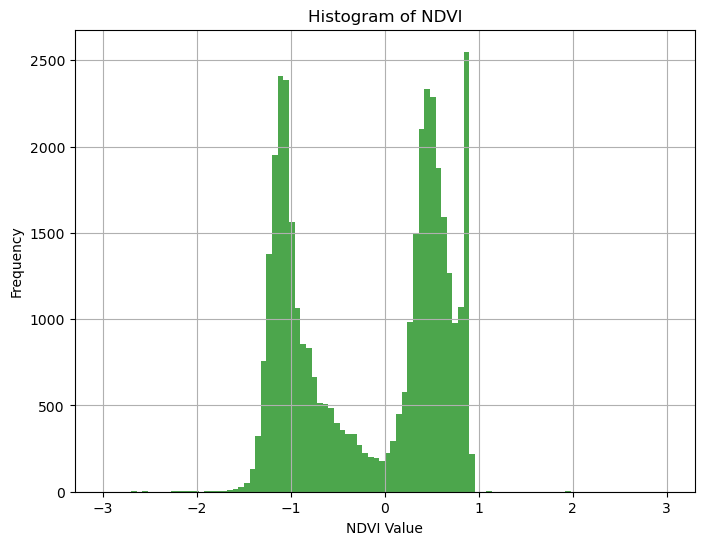

In [7]:
# Open the Landsat images
b5_ds = gdal.Open(Band_5)
b4_ds = gdal.Open(Band_4)

# Read pixel values into NumPy arrays
b5_array = b5_ds.GetRasterBand(1).ReadAsArray()
b4_array = b4_ds.GetRasterBand(1).ReadAsArray()

# Calculate Vegetative Index (NDVI)
vegetative_index = (b5_array - b4_array) / (b5_array + b4_array)

#print(vegetative_index)

# Write the result to a new GeoTIFF file
driver = gdal.GetDriverByName('GTiff')
output_ds = driver.Create(NDVI_STS, b5_array.shape[1], b5_array.shape[0], 1, gdal.GDT_Float32)

output_ds.GetRasterBand(1).WriteArray(vegetative_index)
output_ds.SetProjection(b5_ds.GetProjection())
output_ds.SetGeoTransform(b5_ds.GetGeoTransform())
output_ds.FlushCache()
output_ds = None


# Flatten the NDVI array to create a 1D array for histogram plotting
vegetative_index_flat = vegetative_index.flatten()

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(vegetative_index_flat, bins=100, range=(-3, 3), color='green', alpha=0.7)

plt.title('Histogram of NDVI')
plt.xlabel('NDVI Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Landsat Images for Band 4 (Red), Band 5 (NIR) and our calculated NDVI:

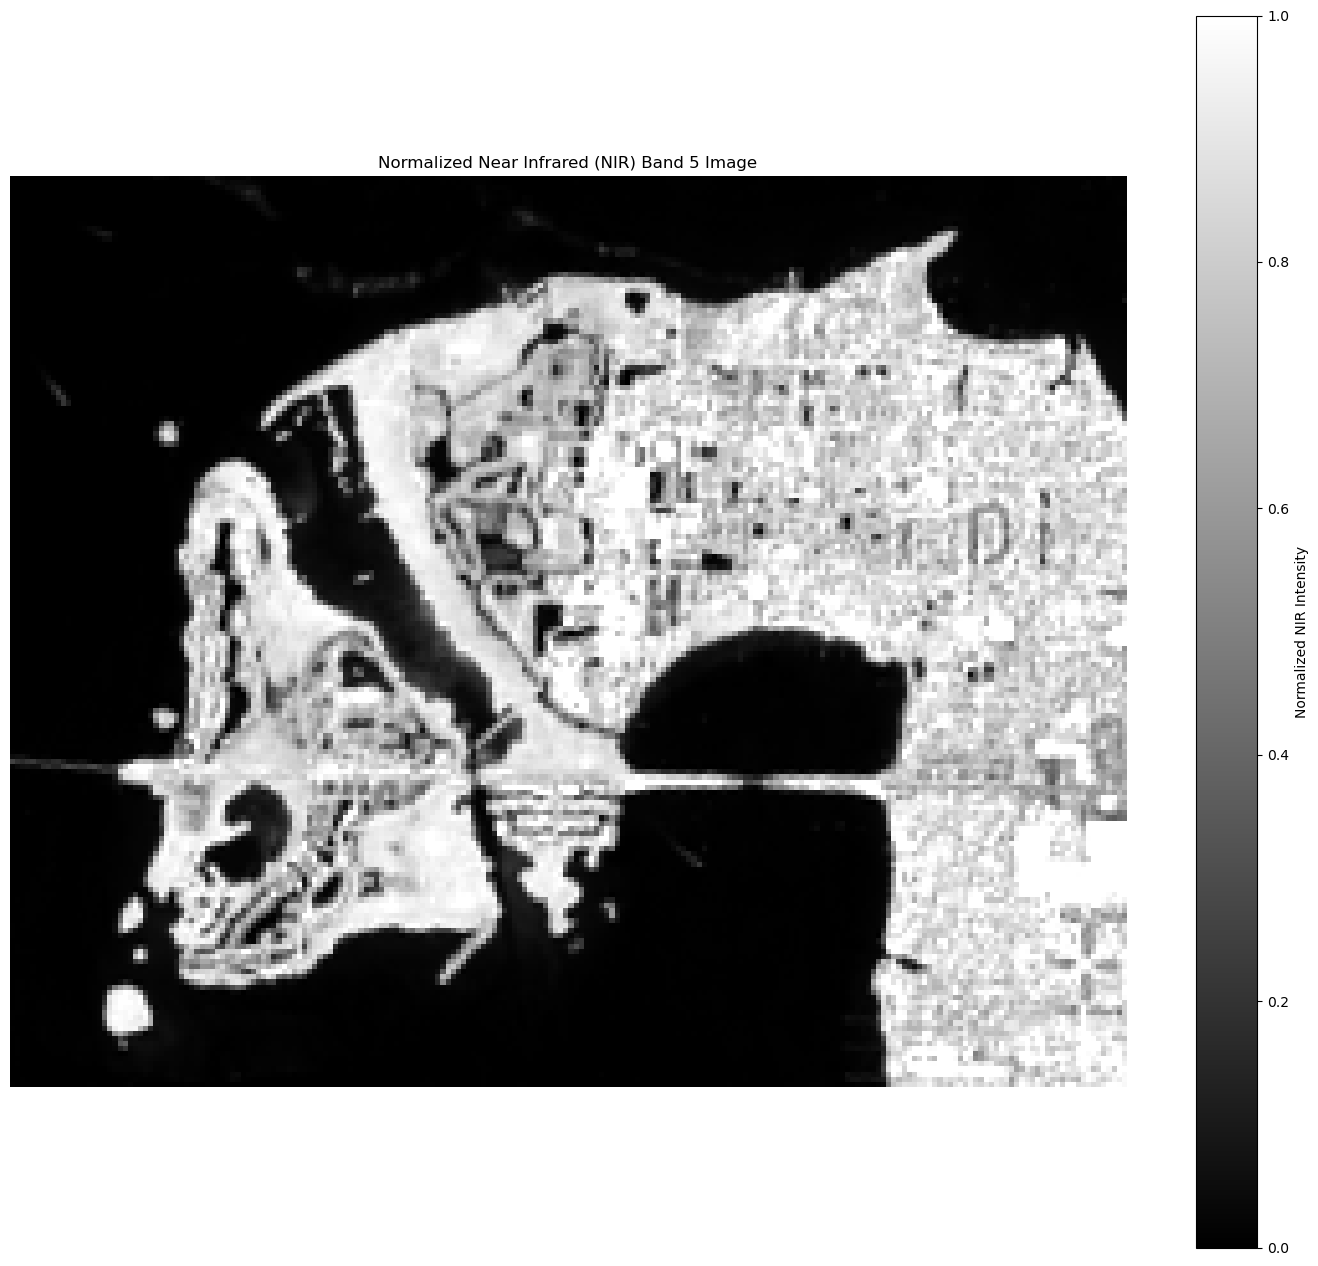

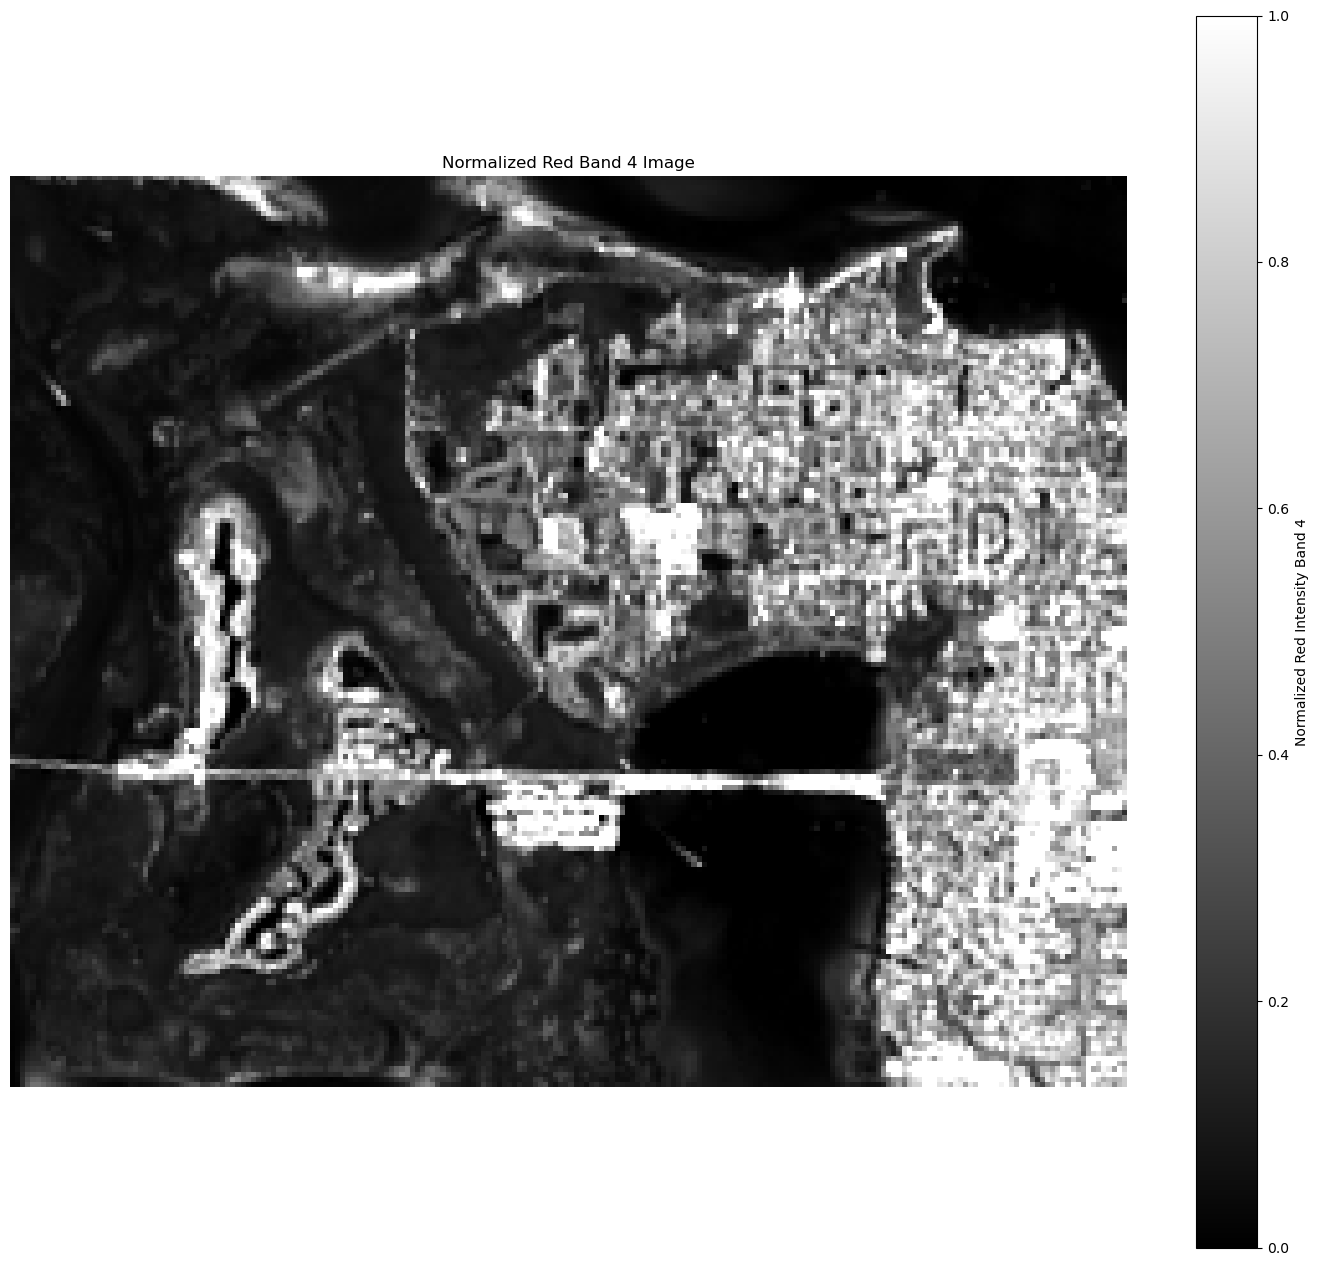

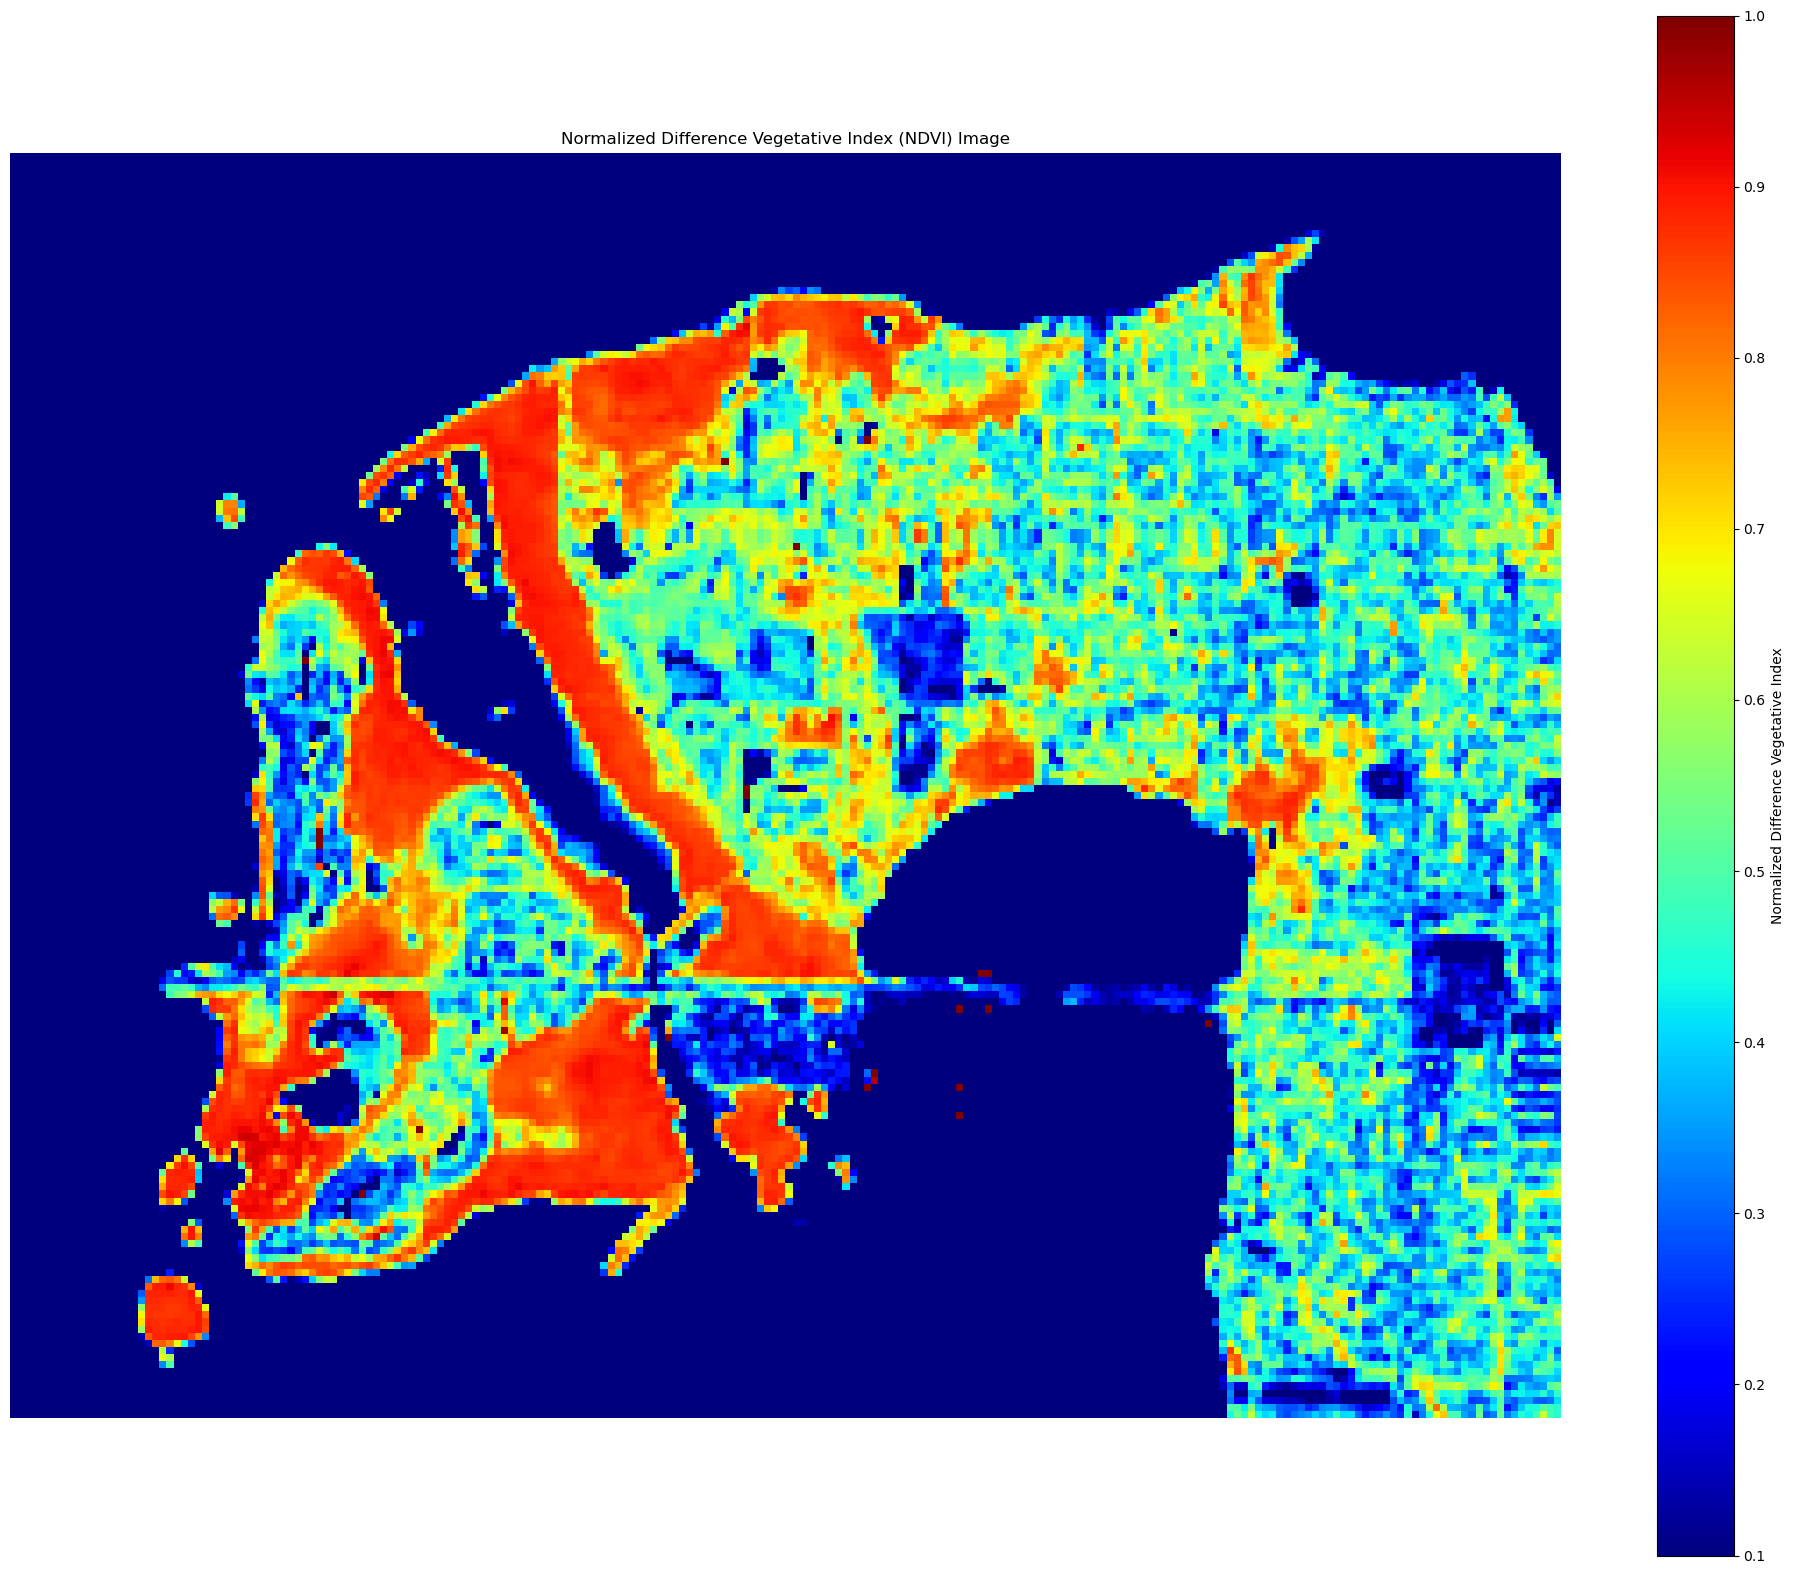

In [8]:
# Open the Vegetative Index raster file
vi_ds = gdal.Open(NDVI_STS)
vi_array = vi_ds.GetRasterBand(1).ReadAsArray()


# Open the NIR and Red bands raster files
#nir_ds = gdal.Open('/Users/craig/Downloads/LC09_L2SP_017041_20240120_20240122_02_T1/LC09_L2SP_017041_20240120_20240122_02_T1_SR_B5.TIF')
#red_ds = gdal.Open('/Users/craig/Downloads/LC09_L2SP_017041_20240120_20240122_02_T1/LC09_L2SP_017041_20240120_20240122_02_T1_SR_B4.TIF')

# Open the Landsat images
# Open the Landsat images
nir_ds = gdal.Open(Band_5)
red_ds = gdal.Open(Band_4)



# Read the NIR and Red bands as arrays
nir_array = nir_ds.GetRasterBand(1).ReadAsArray()
red_array = red_ds.GetRasterBand(1).ReadAsArray()

# Normalize NIR and Red arrays for better visualization
nir_min = np.percentile(nir_array, 5)
nir_max = np.percentile(nir_array, 95)
nir_array_normalized = np.clip((nir_array - nir_min) / (nir_max - nir_min), 0, 1)

red_min = np.percentile(red_array, 5)
red_max = np.percentile(red_array, 95)
red_array_normalized = np.clip((red_array - red_min) / (red_max - red_min), 0, 1)




# Plot the NIR image
plt.figure(figsize=(18, 16))
plt.imshow(nir_array_normalized, cmap='gray')
plt.colorbar(label='Normalized NIR Intensity')
plt.title('Normalized Near Infrared (NIR) Band 5 Image')
plt.axis('off')
plt.show()

# Plot the Red image
plt.figure(figsize=(18, 16))
plt.imshow(red_array_normalized, cmap='gray')
plt.colorbar(label='Normalized Red Intensity Band 4')
plt.title('Normalized Red Band 4 Image')
plt.axis('off')
plt.show()

# Plot the Vegetative Index (VI) image
plt.figure(figsize=(25, 20))
plt.imshow(vi_array, cmap='jet', clim=(0.1, 1))
plt.colorbar(label='Normalized Difference Vegetative Index')
plt.title('Normalized Difference Vegetative Index (NDVI) Image')
plt.axis('off')
plt.show()



---
---
# We have Created a cropped Mangrove geojson file for our use with the code below:

CRS stands for Coordinate Reference System. It is a system that uses coordinates to represent locations on the Earth's surface. A CRS includes a datum, which defines the reference point, orientation, and scale of the coordinate system, as well as a projection, which defines how the curved surface of the Earth is projected onto a flat surface.

There are many different CRSs used around the world, each with its own set of parameters and characteristics. Common examples include geographic coordinate systems (such as latitude and longitude) and projected coordinate systems (such as UTM or Mercator).

In the code snippet below, `src.crs` refers to the coordinate reference system (CRS) associated with the raster dataset loaded using `rasterio`. Specifically, `src` is the variable representing the raster dataset obtained from opening a Landsat file using `rasterio.open(landsat_path)`.

So, `src.crs` gives the CRS information associated with the Landsat raster file. This information typically includes details such as the coordinate system, datum, and projection used for the raster data. Having the CRS information is essential for correctly interpreting and aligning the raster data with other spatial datasets that may have different CRSs.

In geospatial data analysis and mapping, it's crucial to ensure that all datasets are in the same CRS or that they can be properly transformed to match each other's CRS. This ensures accurate spatial analysis and visualization.

The values in `landsat_extent_modified` represent coordinates in the coordinate reference system (CRS) of the Landsat imagery. Typically, Landsat scenes use the Universal Transverse Mercator (UTM) projection system, which measures distances in meters. Therefore, these values are in meters and represent the easting (x) and northing (y) coordinates of the bounding box corners.

To be more specific, here's what each value represents:

- `xmin`: The minimum x-coordinate (easting) of the bounding box, measured in meters.
- `ymin`: The minimum y-coordinate (northing) of the bounding box, measured in meters.
- `xmax`: The maximum x-coordinate (easting) of the bounding box, measured in meters.
- `ymax`: The maximum y-coordinate (northing) of the bounding box, measured in meters.

These coordinates define a rectangular area in the Landsat scene, where `xmin` and `ymin` represent the coordinates of the bottom-left corner of the rectangle, and `xmax` and `ymax` represent the coordinates of the top-right corner.

The `landsat_extent_modified` values represent a modified bounding box extent for the Landsat imagery. In our code, we have replaced the original extent values (`landsat_extent`) with these modified values to create a new bounding box over our study area. These modified values define a smaller extent compared to the original Landsat footprint, essentially creating a subset of the original imagery.

Here are the modified values that we have provided for our code:

- `xmin`: 329,424.0
- `ymin`: 3,040,714.0
- `xmax`: 339,208.0
- `ymax`: 3,046,031.0

These values specify the minimum and maximum coordinates for the bounding box. They represent the minimum and maximum x (longitude) and y (latitude) values for the subset area of the Landsat image. By using these modified extent values, we are effectively defining a smaller area of interest within the Landsat scene for further analysis or processing.

The units of the values stored in the `src.crs` attribute depend on the specific CRS associated with the raster dataset. In the case of Landsat imagery loaded using `rasterio`, the CRS typically represents coordinates in meters rather than latitude and longitude.

Landsat scenes often use a projected coordinate system, such as the Universal Transverse Mercator (UTM) projection, which measures distances in meters. This projection is commonly used for mapping and analysis of large areas because it provides accurate measurements and preserves shape and area properties.

However, it's essential to note that the specific CRS used for Landsat imagery can vary depending on the scene's location and the processing applied to the data. Therefore, it's crucial to check the CRS information associated with the Landsat dataset to determine the units accurately. We can access this information using `src.crs`. Nice!

### The cropping of the image below is based on Landsat max and min values which results in a cropped geojson Mangrove file that extends beyond the boundaries of our Landsat tile:

## The following cropped Mangrove geojson file is hand picked to cover our **Robinson Preserve** study area:

---
---
# **NDVI and Adjust NDVI Cutoffs:**


## Code to create a Histogram of the NDVI values under the cropped Mangrove masks:

This code is used to help us refine our cutoffs used in the above image.


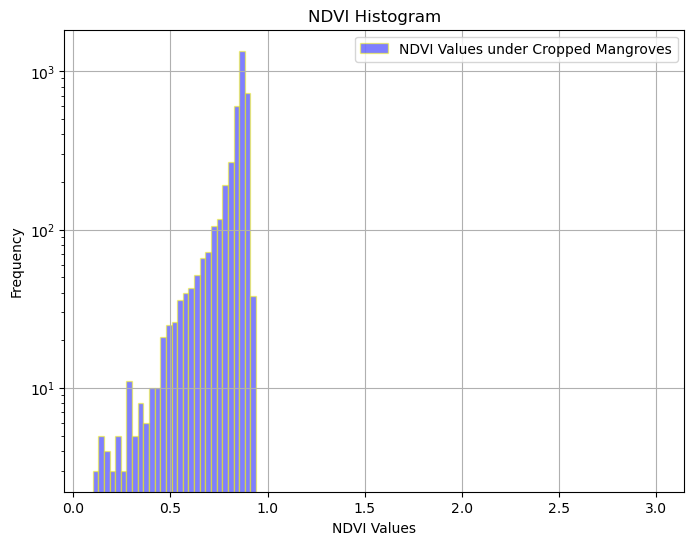

95th Percentile of NDVI Values under Cropped Mangroves: 0.87

99th Percentile of NDVI Values under Cropped Mangroves: 0.91

Max of NDVI Values under Cropped Mangroves: 0.93


In [9]:
# Open the NDVI raster file
vi_ds = rasterio.open(NDVI_STS)

# Read the NDVI image as a numpy array
vi_array = vi_ds.read(1)

# Get the CRS and transform of the NDVI raster
vi_crs = vi_ds.crs
vi_transform = vi_ds.transform

# Open the cropped GeoJSON file containing the mangrove boundaries
geojson_path = Mangrove_Mask_clipped
clipped_mangroves = gpd.read_file(geojson_path)

# Reproject the cropped mangrove boundaries to match the CRS of the NDVI raster
clipped_mangroves = clipped_mangroves.to_crs(vi_crs)

# Mask out NDVI values outside of the cropped mangrove areas
masked_ndvi, _ = rasterio.mask.mask(vi_ds, clipped_mangroves.geometry, crop=True)

# Flatten the masked NDVI array to compute the histogram
masked_ndvi_flat = masked_ndvi.flatten()

# Plot the histogram of all NDVI values (both inside and outside the cropped mangrove areas)
plt.figure(figsize=(8, 6))
#plt.hist(vi_array.flatten(), bins=100, color='red', alpha=0.7, range=(0.02, 0.99), label='All NDVI Values')
plt.hist(masked_ndvi_flat, bins=100, color='blue', edgecolor = 'yellow', alpha=0.5, range=(0.1, 3), label='NDVI Values under Cropped Mangroves')
plt.title('NDVI Histogram')
plt.xlabel('NDVI Values')
plt.ylabel('Frequency')
plt.yscale('log')  # Use a logarithmic scale for the y-axis
plt.legend()
plt.grid(True)
plt.show()


# Filter out nan values from the masked NDVI array
masked_ndvi_valid = masked_ndvi_flat[~np.isnan(masked_ndvi_flat)]


# Compute the 95th percentile of NDVI values under the cropped mangroves
percentile_95 = np.percentile(masked_ndvi_valid, 95)
print("95th Percentile of NDVI Values under Cropped Mangroves:", round(percentile_95,2))
print()

# Compute the 95th percentile of NDVI values under the cropped mangroves
percentile_99 = np.percentile(masked_ndvi_valid, 99.9)
print("99th Percentile of NDVI Values under Cropped Mangroves:", round(percentile_99,2))
print()

# Compute the max value of NDVI values under the cropped mangroves
max = np.percentile(masked_ndvi_valid, 99.99)
print("Max of NDVI Values under Cropped Mangroves:", round(max,2))


**The above values are rough NDVI cutoffs to be used to indentify Mangrove Habitats.**


# Run the code below using the Max Value from the NDVI as a guide to the cutoff to identify Mangrove Forests:


---
---


# **Plot NDVI and Adjust NDVI Cutoffs:**


## We will add a NDVI cutoff Range Slide to change use NDVI historam normalization to re-color the Landsat image.

## We also add X and Y Range Sliders to zoom in on the Landsat image:



In [10]:
# Open the Vegetative Index raster file
vi_ds = gdal.Open(NDVI_STS)
vi_array = vi_ds.GetRasterBand(1).ReadAsArray()

# Get CRS from the NDVI raster
vi_crs = CRS.from_wkt(vi_ds.GetProjection())

# Open the cropped GeoJSON file containing the mangrove boundaries
geojson_path = Mangrove_Mask_clipped
clipped_mangroves = gpd.read_file(geojson_path)

# Reproject the cropped mangrove boundaries to match the CRS of the NDVI raster
clipped_mangroves = clipped_mangroves.to_crs(vi_crs)

# Define a function to display the NDVI image based on the selected range and zoom level
def display_ndvi_image( xlim, ylim,range_values):
    low, high = range_values
    ndvi_display = np.where((vi_array >= low) & (vi_array <= high), vi_array, np.nan)
    fig = plt.figure(figsize=(20, 15))
    gs = fig.add_gridspec(2, 1, height_ratios=[1, 10])  # 2 rows: histogram and NDVI image

    # Plot histogram
    ax_hist = fig.add_subplot(gs[0])
    ax_hist.hist(vi_array.flatten(), bins=100, color='skyblue', alpha=0.7, range=(0.1, 3))
    ax_hist.axvline(low, color='red', linestyle='dashed', linewidth=3)
    ax_hist.axvline(high, color='red', linestyle='dashed', linewidth=3)
    ax_hist.set_title('NDVI Histogram')
    ax_hist.set_xlabel('NDVI Values')
    ax_hist.set_ylabel('Frequency')
    ax_hist.grid(True)

    #ax_hist.set_yscale('log')  # Use a logarithmic scale for the y-axis


    # Plot NDVI image
    ax_ndvi = fig.add_subplot(gs[1])
    im = ax_ndvi.imshow(ndvi_display, cmap='jet', extent=(0, vi_ds.RasterXSize, 0, vi_ds.RasterYSize))
    plt.colorbar(im, ax=ax_ndvi, label='Normalized Difference Vegetative Index')
    ax_ndvi.set_title('NDVI Image (Selected Range: [{}, {}])'.format(low, high))
    ax_ndvi.set_xlim(xlim)
    ax_ndvi.set_ylim(ylim)
    ax_ndvi.grid(True)  # Enable grid for better visualization

    # Plot the cropped mangrove boundaries on top of the NDVI image
    clipped_mangroves.plot(ax=ax_ndvi, edgecolor='red', facecolor='none')

    plt.show()

# Define the range slider for NDVI values
ndvi_range_slider = FloatRangeSlider(
    value=[0.1, 1.2],
    min=0.0,
    max=3.0,
    step=0.01,
    description='NDVI Range:',
    continuous_update=False,
    readout_format='.2f',
    layout=Layout(width='100%')  # Adjust width of the slider
)

# Define the range sliders for zooming (x and y limits)
xlim_slider = FloatRangeSlider(
    value=[0, 218],
    min=0,
    max=218,
    step=1,
    description='X-Limit:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)

ylim_slider = FloatRangeSlider(
    value=[0, 178],
    min=0,
    max=178,
    step=1,
    description='Y-Limit:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)

# Create the interactive widget
ndvi_interactive = interact(
    display_ndvi_image,
    range_values=ndvi_range_slider,
    xlim=xlim_slider,
    ylim=ylim_slider
)



interactive(children=(FloatRangeSlider(value=(0.0, 218.0), continuous_update=False, description='X-Limit:', la…

## Using the NDVI values from our histogram as approximate cutoffs to estimate the Mangrove locations for our study area should give us an 80-85% solution to predict Mangrove Habitats in our Study area.

Now, to refine these Mangrove habitats we should use our STELLA instrument to gather hard data on the spectral content for our mangroves and even the species that might relate to subtle surface elevations for refinement.

Also, the false positives that we show to the East of Robinson Preserve can probably be rulled out because they are not adjacent to salt water.


## These are the GeoData mapped Mangrove Habitats for our Study Area:

NDVI calculates an index ranging from 0 to 1. For our estimate we colored our NDVI image from 0.2 to 0.46, where these cutoff values create the surface areas that correlates fairly well to the mapped mangrove locations as reported by [GeoData](https://geodata.myfwc.com/datasets/a78a27e02f9d4a71a3c3357aefc35baf/about) as shown in the bottom image below. We probably have an 80% solution using this simple technique; and other than some lawns in Bradenton, we are doing pretty well. With a few rules applied (mangrove habitats must be adjacent to salt water, near sea-level elevations  ….) we can narrow down our mangrove habitat picks too. In addition, we can screen out a lot of the noise by requiring x clustering pixels and refining our cutoffs.

>
>![image.png](https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-Landsat-Data-to-Calculate-NDVI-and-PNDVI/blob/main/Mapped_Mangroves.png?raw=1)
>